In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

## Mutual Information in Classification

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["target"] = data.target

In [3]:
df['target'].unique()

array([0, 1, 2])

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
X = df.drop("target",axis=1)  
y = df["target"] 

In [6]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [7]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0


In [8]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.42402362, 0.30024065, 0.13158134, 0.256591  , 0.2143786 ,
       0.46336096, 0.71759628, 0.12512283, 0.26506227, 0.63585337,
       0.56078385, 0.55040364, 0.52232485])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

flavanoids                      0.717596
color_intensity                 0.635853
hue                             0.560784
od280/od315_of_diluted_wines    0.550404
proline                         0.522325
total_phenols                   0.463361
alcohol                         0.424024
malic_acid                      0.300241
proanthocyanins                 0.265062
alcalinity_of_ash               0.256591
magnesium                       0.214379
ash                             0.131581
nonflavanoid_phenols            0.125123
dtype: float64

<AxesSubplot:>

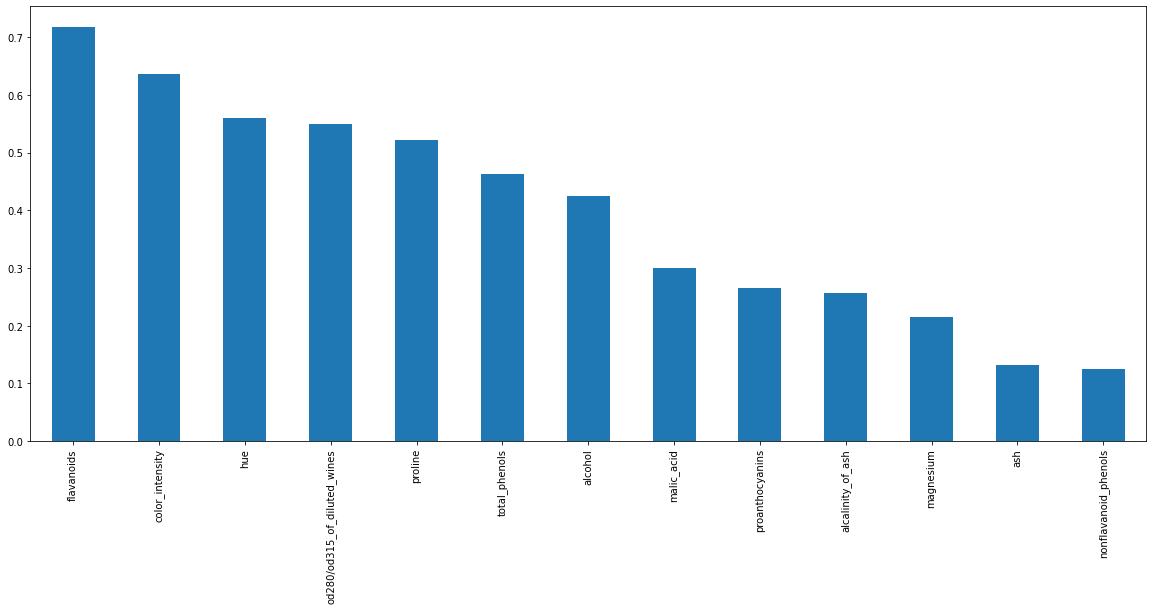

In [10]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [11]:
from sklearn.feature_selection import SelectKBest

In [12]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines',
       'proline'],
      dtype='object')

## Mutual Information in Regression

In [13]:
df2 = pd.read_csv('house.csv',usecols=['LandContour','LandSlope', 'OverallQual',
'OverallCond','RoofStyle','RoofMatl', 'MasVnrType','SaleType','SaleCondition', 'SalePrice'])

In [14]:
df2.head()

,LandContour,LandSlope,OverallQual,OverallCond,RoofStyle,RoofMatl,MasVnrType,SaleType,SaleCondition,SalePrice
0,Lvl,Gtl,7,5,Gable,CompShg,BrkFace,WD,Normal,208500
1,Lvl,Gtl,6,8,Gable,CompShg,None,WD,Normal,181500
2,Lvl,Gtl,7,5,Gable,CompShg,BrkFace,WD,Normal,223500
3,Lvl,Gtl,7,5,Gable,CompShg,None,WD,Abnorml,140000
4,Lvl,Gtl,8,5,Gable,CompShg,BrkFace,WD,Normal,250000


In [15]:
ordinal_label = {k: i for i, k in enumerate(df2['LandContour'].unique(), 0)}
df2['LandContour'] = df2['LandContour'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(df2['LandSlope'].unique(), 0)}
df2['LandSlope'] = df2['LandSlope'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(df2['RoofStyle'].unique(), 0)}
df2['RoofStyle'] = df2['RoofStyle'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(df2['RoofMatl'].unique(), 0)}
df2['RoofMatl'] = df2['RoofMatl'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(df2['SaleType'].unique(), 0)}
df2['SaleType'] = df2['SaleType'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(df2['SaleCondition'].unique(), 0)}
df2['SaleCondition'] = df2['SaleCondition'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(df2['MasVnrType'].unique(), 0)}
df2['MasVnrType'] = df2['MasVnrType'].map(ordinal_label)

In [16]:
df2.isnull().sum()

LandContour      0
LandSlope        0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
MasVnrType       0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [17]:
X = df2.drop(columns='SalePrice')
y = df2['SalePrice']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.03315843, 0.00973753, 0.51284145, 0.15223678, 0.02891112,
       0.        , 0.12561223, 0.07453434, 0.07007632])

In [20]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.512841
OverallCond      0.152237
MasVnrType       0.125612
SaleType         0.074534
SaleCondition    0.070076
LandContour      0.033158
RoofStyle        0.028911
LandSlope        0.009738
RoofMatl         0.000000
dtype: float64

<AxesSubplot:>

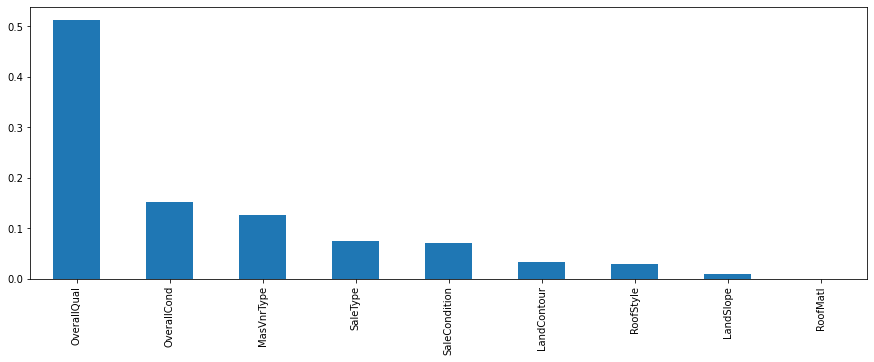

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [22]:
from sklearn.feature_selection import SelectPercentile

In [23]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f48252ced30>)

In [24]:
selected_top_columns.get_support()

array([False, False,  True, False, False, False,  True, False, False])

In [25]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'MasVnrType'], dtype='object')

### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y)
and
IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for 
information gain. Technically, they calculate the same quantity
if applied to the same data.